In [19]:
import sys
sys.path.append('../..')
sys.path.append('../data')
sys.path.append('../../helper_code')

from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import numpy as np
import pandas as pd
from IPython.display import display
import copy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from helper_code.custom_kernel import *
from helper_code.util import *

In [24]:
input_dataset = ['c', 'c_lexi', 'CE', 'CE_lexi', 'CSE', 'CSE_lexi']
dataset_dict = {}

for data in input_dataset:
    dataset_dict[data] = pd.read_csv(f'../data/coronene_training_data/{data}.csv')

delta_total_energy = pd.read_csv(f'../data/coronene_training_data/delta_total_energy.csv')
delta_delta_total_energy = pd.read_csv(f'../data/coronene_training_data/delta_delta_total_energy.csv')

In [4]:
model_collection = {}
performance_summary = {}

## Vanilla ##

In [5]:
X = dataset_dict['c'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_Gaussian_delta'] = model
performance_summary['ANM_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,2322.083151,46.118926
2,128,2025.929082,13.00216
3,256,1910.417181,5.191908
4,512,1848.789238,6.467236
5,1024,1765.338166,7.008218
6,2048,1660.596187,17.018644


In [6]:
X = dataset_dict['c_lexi'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_lexi_Gaussian_delta'] = model
performance_summary['ANM_lexi_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,1435.396108,26.235736
2,128,1290.727524,11.837338
3,256,1206.031426,4.536711
4,512,1163.494159,4.433648
5,1024,1130.639551,4.972413
6,2048,1086.01135,9.565169


## CE with Gaussian ##

In [7]:
X = dataset_dict['CE'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CE_Gaussian_delta'] = model
performance_summary['ANM_CE_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,2309.920286,45.465796
2,128,1999.8659,13.546942
3,256,1855.797951,6.128348
4,512,1744.529301,7.744553
5,1024,1584.956369,7.125538
6,2048,1396.187233,13.20196


In [8]:
X = dataset_dict['CE_lexi'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CE_lexi_Gaussian_delta'] = model
performance_summary['ANM_CE_lexi_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,1429.960347,26.301362
2,128,1279.11012,11.835571
3,256,1183.056693,4.335191
4,512,1120.96614,4.915474
5,1024,1056.157739,5.232611
6,2048,968.470759,7.773471


## CSE with Gaussian ##

In [9]:
X = dataset_dict['CSE'].to_numpy()
y = delta_total_energy.to_numpy()

best_params = {'alpha': 1.6596764933651303e-07, 'gamma': 2.1567299387422978e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_Gaussian'] = model
performance_summary['ANM_CSE_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,55.350294,1.912755
2,128,44.425299,0.422063
3,256,40.526336,0.306236
4,512,37.779552,0.202503
5,1024,35.314846,0.148165
6,2048,33.134935,0.361095


In [10]:
X = dataset_dict['CSE_lexi'].to_numpy()
y = delta_total_energy.to_numpy()

best_params = {'alpha': 1.6596764933651303e-07, 'gamma': 2.1567299387422978e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_Gaussian'] = model
performance_summary['ANM_CSE_lexi_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,54.893334,0.498404
2,128,43.88468,0.463466
3,256,40.546514,0.284975
4,512,37.587013,0.228472
5,1024,35.053687,0.149522
6,2048,32.95756,0.336174


In [11]:
X = dataset_dict['CSE'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 1.6596764933651303e-07, 'gamma': 2.1567299387422978e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_Gaussian_delta'] = model
performance_summary['ANM_CSE_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,54.666116,1.930799
2,128,44.122647,0.430607
3,256,40.285701,0.298247
4,512,37.654622,0.201863
5,1024,35.298823,0.145509
6,2048,33.190847,0.364882


In [12]:
X = dataset_dict['CSE_lexi'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 1.6596764933651303e-07, 'gamma': 2.1567299387422978e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_Gaussian_delta'] = model
performance_summary['ANM_CSE_lexi_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,54.130252,0.652736
2,128,43.560631,0.478574
3,256,40.325913,0.274173
4,512,37.479214,0.225005
5,1024,35.026728,0.151969
6,2048,32.990988,0.343056


## Local CSE ##

In [26]:
CSE_local = np.genfromtxt("../data/coronene_training_data/CSE_local.csv", delimiter=',').reshape((2400, 24, 24))
coronene_energy_raw_data = np.load("../data/coronene_raw_data/coronene_mutants_pbe0_pcx2.npz", allow_pickle=True)
charges = coronene_energy_raw_data['charges'][:, :24]

In [28]:
X = CSE_local
y = delta_delta_total_energy.to_numpy()
best_params = {'lambda': 0.20189699004012868, 'length': 1.9495988615657756}

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 5

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance_local(best_params, X, y, charges, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000
        print(average_error)

performance_summary['CSE_local'] = model_performance

display(model_performance)

0.5324297841134331
0.39189871725000697
0.27727179308724337
0.2228932894905193
0.1923385228019357
0.16566531384635158


,training size,average MAE (mHa),standard deviation (mHa)
1,64,532.429784,14.830769
2,128,391.898717,5.704674
3,256,277.271793,5.611379
4,512,222.893289,1.736478
5,1024,192.338523,2.01751
6,2048,165.665314,4.544114


## CSE with Extended Gaussian ##

In [13]:
# X = dataset_dict['CSE_lexi']
# y = delta_delta_total_energy

# best_params = {'alpha': 5.948688011403127e-11, 'beta': 2.8505311767038538e-12, 'epsilon': 4.727331943165293e-07, 'gamma': 5.298346661430054e-10}
# model = KernelRidge(kernel='precomputed', alpha=best_params['alpha'])

# columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
# model_performance = pd.DataFrame(columns=columns)

# training_size = [2**i for i in range(6, 12)]
# num_trials = 10

# with warnings.catch_warnings():
#     for index, num_training_sample in enumerate(training_size):
#         warnings.filterwarnings("ignore")
#         index = index + 1
#         average_error, std_dev_error = evaluate_performance_vectorized_kernel(model, X, y, num_training_sample, num_trials, vectorized_extended_gaussian_kernel, best_params)
#         model_performance.at[index, 'training size'] = num_training_sample
#         model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
#         model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

# model_collection['ANM_CSE_lexi_ex_Gaussian_delta'] = model
# performance_summary['ANM_CSE_lexi_ex_Gaussian_delta'] = model_performance

# display(model_performance)

## Learning Curve ##

In [29]:
print(performance_summary.keys())

dict_keys(['ANM_Gaussian_delta', 'ANM_lexi_Gaussian_delta', 'ANM_CE_Gaussian_delta', 'ANM_CE_lexi_Gaussian_delta', 'ANM_CSE_Gaussian', 'ANM_CSE_lexi_Gaussian', 'ANM_CSE_Gaussian_delta', 'ANM_CSE_lexi_Gaussian_delta', 'CSE_local'])


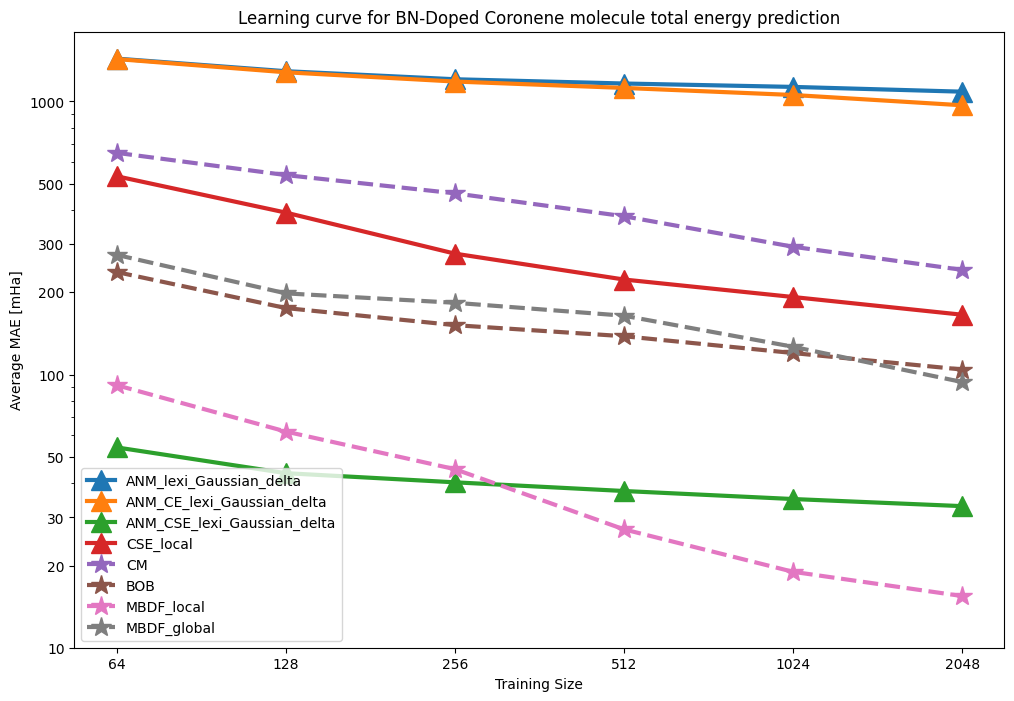

In [31]:
# performance_summary.pop("ANM_CSE_lexi_nd_Gaussian_delta")

target_key = ['ANM_lexi_Gaussian_delta', 'ANM_CE_lexi_Gaussian_delta', 'ANM_CSE_lexi_Gaussian_delta', 'CSE_local']

plt.figure(figsize=(12, 8))

baseline = {'CM': [648.5527354673592, 537.6985692537448, 461.0180882987335, 379.9858538857778, 293.8438973546341, 241.82578139489823], 
            'BOB': [237.41250993141233, 175.25626039916506, 151.71095095761646, 138.19860398430035, 119.94745348162638, 104.37619882451854], 
            'MBDF_local': [91.45978157923743, 61.880635092542924, 45.05741969642941, 27.131326474704487, 18.96572152685743, 15.459664235069118], 
            'MBDF_global': [274.40293174604693, 198.34254220451777, 183.23390683681885, 164.29180299704285, 126.44938842117904, 93.92669161271573]}

x = performance_summary['ANM_lexi_Gaussian_delta']['training size']
y_values = {}
baseline_y = {}
for key, df in performance_summary.items():
    if key in target_key:
        y_values[key] = df['average MAE (mHa)']
for key, value in baseline.items():
    baseline_y[key] = value

linewidth = 3
markersize = 15

for key, y_value in y_values.items():
    plt.plot(x, y_value, label=key, marker='^', linestyle='-', linewidth=linewidth, markersize=markersize)
for key, y_value in baseline_y.items():
    plt.plot(x, y_value, label=key, marker='*', linestyle='--', linewidth=linewidth, markersize=markersize) 


plt.title('Learning curve for BN-Doped Coronene molecule total energy prediction')
plt.xlabel('Training Size')
plt.ylabel('Average MAE [mHa]')
plt.legend()

plt.xscale('log', base=2)
plt.yscale('log', base=10)
xticks = [2**i for i in range(6, 12)]
yticks = [10, 20, 30, 50, 100, 200, 300, 500, 1000]
plt.xticks(xticks, labels = xticks)
plt.yticks(yticks, labels = yticks)

plt.savefig('../graph/[Coronene] [5.0] Learning curve for BN-Doped Coronene molecule total energy prediction.png', dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
x = performance_summary['ANM_Gaussian']['training size']
y = performance_summary['ANM_CSE_lexi_Gaussian_delta']['average MAE (mHa)']
plt.plot(x, y, label=key, marker='^', linestyle='-', linewidth=linewidth, markersize=markersize)

plt.title('Learning curve for BN-Doped Coronene molecule total energy prediction')
plt.xlabel('Training Size')
plt.ylabel('Average MAE [mHa]')
plt.legend()

plt.xscale('log', base=2)
plt.yscale('log', base=10)
xticks = [2**i for i in range(6, 12)]
yticks = [100, 200]
plt.xticks(xticks, labels = xticks)
plt.yticks(yticks, labels = yticks)

plt.show()